<a href="https://colab.research.google.com/github/simjak/notebooks/blob/main/6_Levels_Of_Text_Splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install llama_index
!pip install langchain
!pip install unstructured
# !pip install pdf2image
# !pip install pdfminer.six
!pip install unstructured-inference
# !pip install pikepdf
# !pip install pypdf
!pip install ruptures
!pip install sentence_transformers

  Using cached unstructured_inference-0.7.24-py3-none-any.whl (60 kB)
  Using cached layoutparser-0.3.4-py3-none-any.whl (19.2 MB)
  Using cached python_multipart-0.0.9-py3-none-any.whl (22 kB)
  Using cached onnx-1.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/mntDrive/', force_remount = True)
%cd '/mntDrive/My Drive/01_Chunking/'

Mounted at /mntDrive/
/mntDrive/My Drive/01_Chunking


In [ ]:
from sentence_transformers import SentenceTransformer

# 6 Levels Of Text Splitting

In this tutorial we are reviewing the 6 Levels Of Text Splitting. This is an unofficial list put together for fun and educational purposes.

Ever try to put a long piece of text into ChatGPT but it tells you it’s too long? Or you're trying to give your application better long term memory, but it’s still just not quite working.

One of the most effective strategies to improve performance of your language model applications is to split your large data into smaller pieces. This is call splitting or chunking (we'll use these terms interchangeably). In the world of multi-modal, splitting also applies to images.

We are going to cover a lot, but if you make it to the end, I guarantee you’ll have a solid grasp on chunking theory, strategies, and resources to learn more.

**Levels Of Text Splitting**
* **Level 1: [Character Splitting](#CharacterSplitting)** - Simple static character chunks of data
* **Level 2: [Recursive Character Text Splitting](#RecursiveCharacterSplitting)** - Recursive chunking based on a list of separators
* **Level 3: [Document Specific Splitting](#DocumentSpecific)** - Various chunking methods for different document types (PDF, Python, Markdown)
* **Level 4: [Semantic Splitting](#SemanticChunking)** - Embedding walk based chunking
* **Level 5: [Agentic Splitting](#AgenticChunking)** - Experimental method of splitting text with an agent-like system. Good for if you believe that token cost will trend to $0.00
* **\*Bonus Level:\*** **[Alternative Representation Chunking + Indexing](#BonusLevel)** - Derivative representations of your raw text that will aid in retrieval and indexing

**Notebook resources:**
* [Video Overview]() - Walkthrough of this code with commentary
* [ChunkViz.com](https://www.chunkviz.com/) - Visual representation of chunk splitting methods
* [RAGAS](https://github.com/explodinggradients/ragas) - Retrieval evaluation framework

This tutorial was created with ❤️ by [Greg Kamradt](https://twitter.com/GregKamradt). MIT license, attribution is always welcome.

This tutorial will use code from LangChain (`pip install langchain`) & Llama Index (`pip install llama-index`)

**Evaluations**

It's important to test your chunking strategies in retrieval evals. It doesn't matter how you chunk if the performance of your application isn't great.

Eval Frameworks:

* [LangChain Evals](https://python.langchain.com/docs/guides/evaluation/)
* [Llama Index Evals](https://docs.llamaindex.ai/en/stable/module_guides/evaluating/root.html)
* [RAGAS Evals](https://github.com/explodinggradients/ragas)

I'm not going to demo evals for each method because success is domain specific. The arbitrary eval that I pick may not be suitable for your data. If anyone is interested in collaborating on a rigorous evaluation of different chunking strategies, please reach out (contact@dataindependent.com).

If you only walk away from this tutorial with one thing have it be the **The Chunking Commandment**

**The Chunking Commandment:** Your goal is not to chunk for chunking sake, our goal is to get our data in a format where it can be retrieved for value later.

## Level 1: Character Splitting <a id="CharacterSplitting"></a>
Character splitting is the most basic form of splitting up your text. It is the process of simply dividing your text into N-character sized chunks regardless of their content or form.

This method isn't recommended for any applications - but it's a great starting point for us to understand the basics.

* **Pros:** Easy & Simple
* **Cons:** Very rigid and doesn't take into account the structure of your text

Concepts to know:
* **Chunk Size** - The number of characters you would like in your chunks. 50, 100, 100,000, etc.
* **Chunk Overlap** - The amount you would like your sequential chunks to overlap. This is to try to avoid cutting a single piece of context into multiple pieces. This will create duplicate data across chunks.

First let's get some sample text

In [ ]:
text = "This is the text I would like to chunk up. It is the example text for this exercise"

Then let's split this text manually

In [ ]:
# Create a list that will hold your chunks
chunks = []

chunk_size = 35 # Characters

# Run through the a range with the length of your text and iterate every chunk_size you want
for i in range(0, len(text), chunk_size):
    chunk = text[i:i + chunk_size]
    chunks.append(chunk)
chunks

['This is the text I would like to ch',
 'unk up. It is the example text for ',
 'this exercise']

Congratulations! You just split your first text. We have long way to go but you're already making progress. Feel like a language model practitioner yet?

When working with text in the language model world, we don't deal with raw strings. It is more common to work with documents. Documents are objects that hold the text you're concerned with, but also additional metadata which makes filtering and manipulation easier later.

We could convert our list of strings into documents, but I'd rather start from scratch and create the docs.

Let's load up LangChains `CharacterSplitter` to do this for us

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

Then let's load up this text splitter. I need to specify `chunk overlap` and `separator` or else we'll get funk results. We'll get into those next

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=0, separator='', strip_whitespace=False)

Then we can actually split our text via `create_documents`. Note: `create_documents` expects a list of texts, so if you just have a string (like we do) you'll need to wrap it in `[]`

In [ ]:
text_splitter.create_documents([text])

[Document(page_content='This is the text I would like to ch'),
 Document(page_content='unk up. It is the example text for '),
 Document(page_content='this exercise')]

Notice how this time we have the same chunks, but they are in documents. These will play nicely with the rest of the LangChain world. Also notice how the trailing whitespace on the end of the 2nd chunk is missing. This is because LangChain removes it, see [this line](https://github.com/langchain-ai/langchain/blob/f36ef0739dbb548cabdb4453e6819fc3d826414f/libs/langchain/langchain/text_splitter.py#L167) for where they do it. You can avoid this with `strip_whitespace=False`

**Chunk Overlap & Separators**

**Chunk overlap** will blend together our chunks so that the tail of Chunk #1 will be the same thing and the head of Chunk #2 and so on and so forth.

This time I'll load up my overlap with a value of 4, this means 4 characters of overlap

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=4, separator='')

In [ ]:
text_splitter.create_documents([text])

[Document(page_content='This is the text I would like to ch'),
 Document(page_content='o chunk up. It is the example text'),
 Document(page_content='ext for this exercise')]

Notice how we have the same chunks, but now there is overlap between 1 & 2 and 2 & 3. The 'o ch' on the tail of Chunk #1 matches the 'o ch' of the head of Chunk #2.

I wanted a better way to visualize this, so I made [ChunkViz.com](www.chunkviz.com) to help show it. Here's what the same text looks like.

<div style="text-align: center;">
    <img src="static/ChunkVizCharacter34_4_w_overlap.png" alt="image" style="max-width: 800px;">
</div>

static/ChunkVizCharacterRecursive.png

Check out how we have three colors, with two overlaping sections.

**Separators** are character(s) sequences you would like to split on. Say you wanted to chunk your data at `ch`, you can specify it.

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=0, separator='ch')

In [ ]:
text_splitter.create_documents([text])

[Document(page_content='This is the text I would like to'),
 Document(page_content='unk up. It is the example text for this exercise')]

#### Llama Index

[Llama Index](https://www.llamaindex.ai/) is a great choice for flexibility in the chunking and indexing process. They provide node relationships out of the box which can aid in retrieval later.

Let's take a look at their sentence splitter. It is similar to the character splitter, but using its default settings, it'll split on sentences instead.

In [ ]:
from llama_index.core.text_splitter import SentenceSplitter
from llama_index.core import SimpleDirectoryReader

Load up your splitter

In [ ]:
splitter = SentenceSplitter(
    chunk_size=200,
    chunk_overlap=15,
)

Load up your document

In [ ]:
documents = SimpleDirectoryReader(
    input_files=["mit.txt"]
).load_data()

Create your nodes. Nodes are similar to documents but with more relationship data added to them.

In [ ]:
nodes = splitter.get_nodes_from_documents(documents)

Then let's take a look at one

In [ ]:
nodes[0]

TextNode(id_='c5f1dc0c-7443-4ed6-a936-74ae7a036377', embedding=None, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36044, 'creation_date': '2024-01-26', 'last_modified_date': '2024-01-26', 'last_accessed_date': '2024-01-26'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='4bde57dd-0c55-40bd-ae9d-e59e74970ad5', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36044, 'creation_date': '2024-01-26', 'last_modified_date': '2024-01-26', 'last_accessed_date': '2024-01-26'}, hash='b1a03292029ef96c8abb28f9c139916ff9c2a9852a13bbc0113e8515554c4fe5'), <NodeRelationship.NEXT: '3'>: 

As you can see there is a lot more relationship data held within Llama Index's nodes. We'll talk about those later, I don't want to get ahead of ourselves

Basic Character splitting is likely only useful for a few applications, maybe yours!

## Level 2: Recursive Character Text Splitting
<a id="RecursiveCharacterSplitting"></a>
Let's jump a level of complexity.

The problem with Level #1 is that we don't take into account the structure of our document at all. We simply split by a fix number of characters.

The Recursive Character Text Splitter helps with this. With it, we'll specify a series of separatators which will be used to split our docs.

You can see the default separators for LangChain [here](https://github.com/langchain-ai/langchain/blob/9ef2feb6747f5a69d186bd623b569ad722829a5e/libs/langchain/langchain/text_splitter.py#L842). Let's take a look at them one by one.

* "\n\n" - Double new line, or most commonly paragraph breaks
* "\n" - New lines
* " " - Spaces
* "" - Characters

I'm not sure why a period (".") isn't included on the list, perhaps it is not universal enough? If you know, let me know.

This is the swiss army knife of splitters and my first choice when mocking up a quick application. If you don't know which splitter to start with, this is a good first bet.

Let's try it out

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

Then let's load up a larger piece of text

In [ ]:
text = """
One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.

Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.

It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer. [1]
"""

Now let's make our text splitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 65, chunk_overlap=0)

In [ ]:
text_splitter.create_documents([text])

[Document(page_content="One of the most important things I didn't understand about the"),
 Document(page_content='world when I was a child is the degree to which the returns for'),
 Document(page_content='performance are superlinear.'),
 Document(page_content='Teachers and coaches implicitly told us the returns were linear.'),
 Document(page_content='"You get out," I heard a thousand times, "what you put in." They'),
 Document(page_content='meant well, but this is rarely true. If your product is only'),
 Document(page_content="half as good as your competitor's, you don't get half as many"),
 Document(page_content='customers. You get no customers, and you go out of business.'),
 Document(page_content="It's obviously true that the returns for performance are"),
 Document(page_content='superlinear in business. Some think this is a flaw of'),
 Document(page_content='capitalism, and that if we changed the rules it would stop being'),
 Document(page_content='true. But superlinear returns for

Notice how now there are more chunks that end with a period ".". This is because those likely are the end of a paragraph and the splitter first looks for double new lines (paragraph break).

Once paragraphs are split, then it looks at the chunk size, if a chunk is too big, then it'll split by the next separator. If the chunk is still too big, then it'll move onto the next one and so forth.

For text of this size, let's split on something bigger.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 450, chunk_overlap=0)
text_splitter.create_documents([text])

[Document(page_content="One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear."),
 Document(page_content='Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor\'s, you don\'t get half as many customers. You get no customers, and you go out of business.'),
 Document(page_content="It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer. [1]")]

For this text, 450 splits the paragraphs perfectly. You can even switch the chunk size to 469 and get the same splits. This is because this splitter builds in a bit of cushion and wiggle room to allow your chunks to 'snap' to the nearest separator.

Let's view this visually

<div style="text-align: center;">
    <img src="static/ChunkVizCharacterRecursive.png" alt="image" style="max-width: 800px;">
</div>

Wow - you already made it to level 2, awesome! We're on a roll. If you like the content, I send updates to email subscribers on projects I'm working on. If you want to get the scoop, sign up [here](https://mail.gregkamradt.com/signup).

## Level 3: Document Specific Splitting <a id="DocumentSpecific"></a>

Stepping up our levels ladder, let's start to handle document types other than normal prose in a .txt. What if you have pictures? or a PDF? or code snippets?

Our first two levels wouldn't work great for this so we'll need to find a different tactic.

This level is all about making your chunking strategy fit your different data formats. Let's run through a bunch of examples of this in action

The Markdown, Python, and JS splitters will basically be similar to Recursive Character, but with different separators.

See all of LangChains document splitters [here](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/code_splitter) and Llama Index ([HTML](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules.html#htmlnodeparser), [JSON](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules.html#jsonnodeparser), [Markdown](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules.html#markdownnodeparser))

### Markdown

You can see the separators [here](https://github.com/langchain-ai/langchain/blob/9ef2feb6747f5a69d186bd623b569ad722829a5e/libs/langchain/langchain/text_splitter.py#L1175).

Separators:
* `\n#{1,6}` - Split by new lines followed by a header (H1 through H6)
* ```` ```\n ```` - Code blocks
* `\n\\*\\*\\*+\n` - Horizontal Lines
* `\n---+\n` - Horizontal Lines
* `\n___+\n` - Horizontal Lines
* `\n\n` Double new lines
* `\n` - New line
* `" "` - Spaces
* `""` - Character

In [ ]:
from langchain.text_splitter import MarkdownTextSplitter

In [ ]:
splitter = MarkdownTextSplitter(chunk_size = 40, chunk_overlap=0)

In [ ]:
markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""

In [ ]:
splitter.create_documents([markdown_text])

[Document(page_content='# Fun in California\n\n## Driving'),
 Document(page_content='Try driving on the 1 down to San Diego'),
 Document(page_content='### Food'),
 Document(page_content="Make sure to eat a burrito while you're"),
 Document(page_content='there'),
 Document(page_content='## Hiking\n\nGo to Yosemite')]

Notice how the splits gravitate towards markdown sections. However, it's still not perfect. Check out how there is a chunk with just "there" in it. You'll run into this at low-sized chunks.

### Python

See the python splitters [here](https://github.com/langchain-ai/langchain/blob/9ef2feb6747f5a69d186bd623b569ad722829a5e/libs/langchain/langchain/text_splitter.py#L1069)

* `\nclass` - Classes first
* `\ndef` - Functions next
* `\n\tdef` - Indented functions
* `\n\n` - Double New lines
* `\n` - New Lines
* `" "` - Spaces
* `""` - Characters


Let's load up our splitter

In [ ]:
from langchain.text_splitter import PythonCodeTextSplitter

In [ ]:
python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""

In [ ]:
python_splitter = PythonCodeTextSplitter(chunk_size=100, chunk_overlap=0)

In [ ]:
python_splitter.create_documents([python_text])

[Document(page_content='class Person:\n  def __init__(self, name, age):\n    self.name = name\n    self.age = age'),
 Document(page_content='p1 = Person("John", 36)\n\nfor i in range(10):\n    print (i)')]

Check out how the class stays together in a single document (good), then the rest of the code is in a second document (ok).

I needed to play with the chunk size to get a clean result like that. You'll likely need to do the same for yours which is why using evaluations to determine optimal chunk sizes is crucial.

### JS

Very similar to python. See the separators [here](https://github.com/langchain-ai/langchain/blob/9ef2feb6747f5a69d186bd623b569ad722829a5e/libs/langchain/langchain/text_splitter.py#L983).

Separators:
* `\nfunction` - Indicates the beginning of a function declaration
* `\nconst` - Used for declaring constant variables
* `\nlet` - Used for declaring block-scoped variables
* `\nvar` - Used for declaring a variable
* `\nclass` - Indicates the start of a class definition
* `\nif` - Indicates the beginning of an if statement
* `\nfor` - Used for for-loops
* `\nwhile` - Used for while-loops
* `\nswitch` - Used for switch statements
* `\ncase` - Used within switch statements
* `\ndefault` - Also used within switch statements
* `\n\n` - Indicates a larger separation in text or code
* `\n` - Separates lines of code or text
* `" "` - Separates words or tokens in the code
* `""` - Makes every character a separate element

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

In [ ]:
javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""

In [ ]:
js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS, chunk_size=65, chunk_overlap=0
)

In [ ]:
js_splitter.create_documents([javascript_text])

[Document(page_content='// Function is called, the return value will end up in x'),
 Document(page_content='let x = myFunction(4, 3);'),
 Document(page_content='function myFunction(a, b) {'),
 Document(page_content='// Function returns the product of a and b\n  return a * b;\n}')]

## Level 4: Semantic Chunking <a id="SemanticChunking"></a>
Isn't it weird that we have a global constant for chunk size? Isn't it even weirder that our normal chunking mechanisms don't take into account the actual content?

I'm not the only one who thinks so

<div style="text-align: center;">
    <img src="static/SemanticChunkingtweet.png" style="max-width:50%; height:auto;"><br>
    <span><i><a href="https://twitter.com/thesephist/status/1724159343237456248?s=46">Source</a></i></span>
</div>

There has to be a better way - let's explore and find out.

Embeddings represent the semantic meaning of a string. They don't do much on their own, but when compared to embeddings of other texts you can start to infer the relationship between chunks. I want to lean into this property and explore using embeddings to find clusters of semantically similar texts.

The hypothesis is that semantically similar chunks should be held together.

I tried a few methods:
1) **Heirarchical clustering with positional reward** - I wanted to see how heirarchical clustering of sentence embeddings would do. But because I chose to split on sentences, there was an issue with small short sentences after a long one. You know? (like this last sentenence). They could change the meaning of a chunk, so I added a positional reward and clusters were more likely to form if they were sentences next to each other. This ended up being ok, but tuning the parameters was slow and unoptimal.
2) **Find break points between sequential sentences** - Next up I tried a walk method. I started at the first sentence, got the embedding, then compared it to sentence #2, then compared #2 and #3 and so on. I was looking for "break points" where embedding distance was large. If it was above a threshold, then I considered it the start of a new semantic section. I originally tried taking embeddings of every sentence, but this turned out to be too noisy. So I ended up taking groups of 3 sentences (a window), then got an embedding, then dropped the first sentence, and added the next one. This worked out a bit better.

I'll show method #2 here - It's not perfect by any means, but it's a good starting point for an exploration and I'd love to hear about how you think it could be improved.

First, let's load up our essay that we'll run through. I'm just doing a single essay here to keep the tokens down.

We'll be using Paul Graham's [MIT essay](https://paulgraham.com/mit.html)

In [ ]:
with open('mit.txt') as file:
    essay = file.read()

Then I want to split the entire essay into 1-sentence chunks. I'm going to split on "." "?" and "!". There are better ways to do this but this is quick and easy for now.

In [ ]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', essay)
print (f"{len(single_sentences_list)} senteneces were found")

317 senteneces were found


But a list of sentences can be tough to add more data too. I'm going to turn this into a list of dictionaries (`List[dict]`), of which, the sentences will be a key-value. Then we can start to add more data to each sentence.

In [ ]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': '\n\nWant to start a startup?', 'index': 0},
 {'sentence': 'Get funded by\nY Combinator.', 'index': 1},
 {'sentence': 'October 2006(This essay is derived from a talk at MIT.)Till recently graduating seniors had two choices: get a job or go\nto grad school.',
  'index': 2}]

Great, now that we have our sentences, I want to combine the sentence before and after so that we reduce noise and capture more of the relationships between sequential sentences.

Let's create a function so we can use it again. The `buffer_size` is configurable so you can select how big of a window you want. Keep this number in mind for the later steps. I'll just use `buffer_size=1` for now.

In [ ]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        combined_sentence = ''

        for j in range(i - buffer_size, i):
            if j >= 0:
                combined_sentence += sentences[j]['sentence'] + ' '

        combined_sentence += sentences[i]['sentence']

        for j in range(i + 1, i + 1 + buffer_size):
            if j < len(sentences):
                combined_sentence += ' ' + sentences[j]['sentence']
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [ ]:
sentences[:3]

[{'sentence': '\n\nWant to start a startup?',
  'index': 0,
  'combined_sentence': '\n\nWant to start a startup? Get funded by\nY Combinator.'},
 {'sentence': 'Get funded by\nY Combinator.',
  'index': 1,
  'combined_sentence': '\n\nWant to start a startup? Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)Till recently graduating seniors had two choices: get a job or go\nto grad school.'},
 {'sentence': 'October 2006(This essay is derived from a talk at MIT.)Till recently graduating seniors had two choices: get a job or go\nto grad school.',
  'index': 2,
  'combined_sentence': 'Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)Till recently graduating seniors had two choices: get a job or go\nto grad school. I think there will increasingly be a third option:\nto start your own startup.'}]

Check out how the 2nd sentence (index #1) has the first sentence and 3rd sentence in its `combined_sentence` key now.

Now I want to get embeddings for the combined sentences, so we can get the distances between the groups of 3 and find breakpoints. I'll use OpenAI's embeddings for this.

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Now let's go get our embeddings. We'll do this in batch to make it quicker.

In [ ]:
embeddings = model.encode([x['combined_sentence'] for x in sentences])

Now we have a list of embeddings, but we need to add them to our list of dicts

In [ ]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

Great, now we're getting to the cool part, let's check out the cosine distances between sequential embedding pairs to see where the break points are. We'll add 'distance_to_next' as another key

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']

        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        distance = 1 - similarity

        distances.append(distance)
        sentences[i]['distance_to_next'] = distance

    return distances, sentences

Great, now let's pull out the distances from our sentences and then add them as well

In [ ]:
distances, sentences = calculate_cosine_distances(sentences)

Let's take a look at what our distances array looks like.

In [ ]:
distances[:3]

[0.2111598253250122, 0.05674785375595093, 0.26738232374191284]

Hm, yep, just a bunch of numbers that aren't fun to look at. Let's plot them.

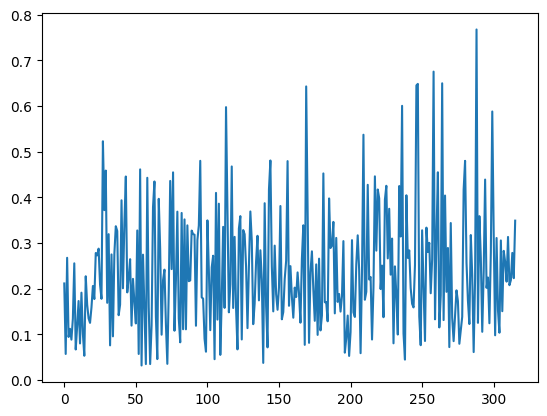

In [ ]:
import matplotlib.pyplot as plt

plt.plot(distances);

Hm, cool! It's interesting to see sections where distances are smaller and then areas of larger distances. What stands out to me most is the outliers which are spread out.

There are many ways to chunk up the essay based off these distances, but I'm going to consider any distance above the 95th percentile of distances as a break point. This is the only parameter we'll need to config.

I'm going to build in the final viz, check out the video for an iterative build and an overview.

Let's look at the chunks that came out

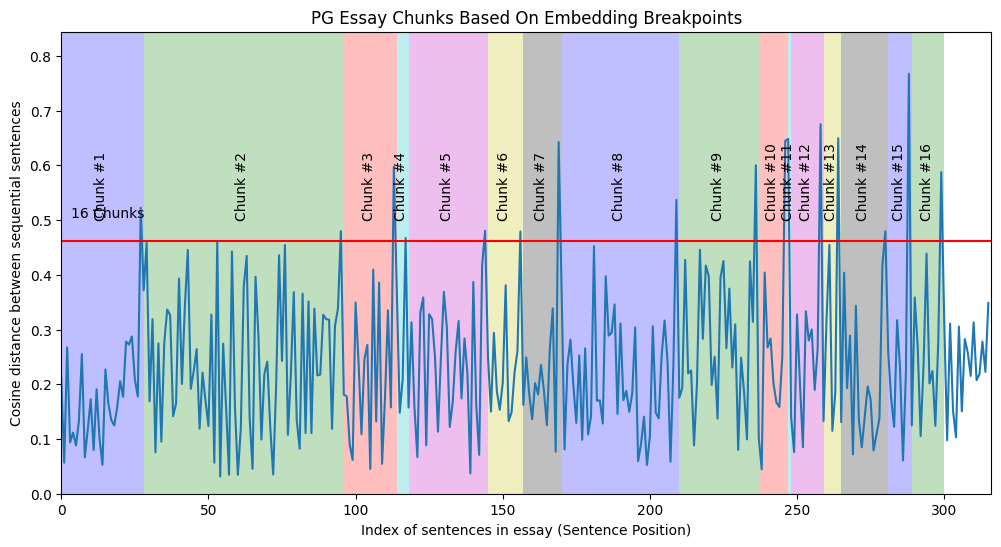

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'distances' is a numpy array of distances between elements in your sequence.
# Example: distances = np.array([0.1, 0.15, 0.2, 0.05, 0.3, 0.25])

plt.figure(figsize=(12, 6))
plt.plot(distances);

# Determine the upper bound for y-axis
y_upper_bound = max(distances) * 1.1  # Adjust to be slightly higher than the max distance
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# Determine the distance threshold for outliers
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold)
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Count distances above the threshold
num_distances_above_threshold = np.sum(distances > breakpoint_distance_threshold)
plt.text(x=len(distances) * 0.01, y=breakpoint_distance_threshold + y_upper_bound * 0.05,
         s=f"{num_distances_above_threshold} Chunks");

# Identify indices where distances exceed the threshold
indices_above_thresh = np.where(distances > breakpoint_distance_threshold)[0]

# Shading and labeling the identified chunks
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    if i == 0:
        start_index = 0
    else:
        start_index = indices_above_thresh[i - 1] + 1

    end_index = breakpoint_index + 1

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index - 1]),
             y=breakpoint_distance_threshold + y_upper_bound * 0.05,
             s=f"Chunk #{i + 1}", horizontalalignment='center', rotation='vertical')

# Title and labels
plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

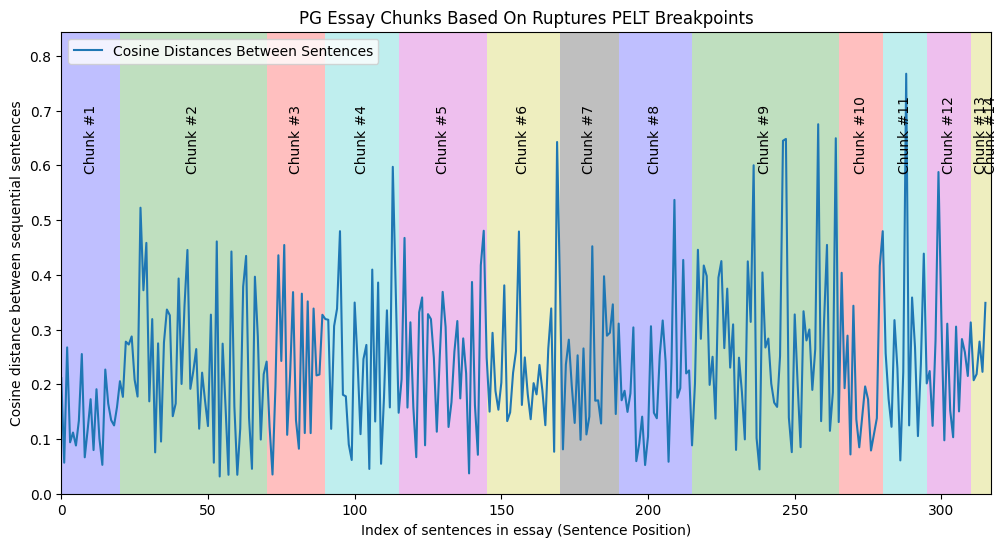

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from ruptures import Pelt
from ruptures.base import BaseCost
from ruptures.exceptions import NotEnoughPoints
from scipy.spatial.distance import jensenshannon

class CosineCost(BaseCost):
    model = "custom_cosine"
    min_size = 2
    def fit(self, signal):
        self.signal = signal
        self.gram = cosine_similarity(signal, dense_output=False)
        return self
    def error(self, start, end) -> float:
        if end - start < self.min_size:
            raise NotEnoughPoints
        sub_gram = self.gram[start:end, start:end]
        val = sub_gram.diagonal().sum()
        val -= sub_gram.sum() / (end - start)
        return val

def process_document(sentences):
    sentence_embeddings = model.encode(sentences)
    algo = Pelt(custom_cost=CosineCost(), min_size=1).fit(sentence_embeddings)
    bkps = algo.predict(pen=1.5)
    bkps.append(len(sentences))
    return bkps

breakpoints = [0] + process_document(sentences)

plt.figure(figsize=(12, 6))
y_upper_bound = max(distances) * 1.1
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(sentences))

plt.plot(distances, label='Cosine Distances Between Sentences')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(breakpoints) - 1):
    start_index = breakpoints[i]
    end_index = breakpoints[i + 1] if i < len(breakpoints) - 1 else len(sentences)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=y_upper_bound * 0.7,
             s=f"Chunk #{i+1}", horizontalalignment='center',
             rotation='vertical')

plt.title("PG Essay Chunks Based On Ruptures PELT Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.legend()
plt.show()

Well now that we've succefully distracted ourselves with a visualization, now we need to combine the sentences into chunks.

Because we have our breakpoints [23, 40, 51...] I want to make the first chunk 0-22, since the distance jumped on sentence 23.

In [ ]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)

    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

Great now let's manually inspect a few to make sure they look ok.

In [ ]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200

    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
Want to start a startup? Get funded by
Y Combinator. October 2006(This essay is derived from a talk at MIT.)Till recently graduating seniors had two choices: get a job or go
to grad school. I think
...
if you start a startup explicitly to get rich, the money you
might get seems pretty theoretical most of the time. What drives
you day to day is not wanting to look bad.You probably can't change that.


Chunk #1
Even if you could, I don't think
you'd want to; someone who really, truly doesn't care what his peers
think of him is probably a psychopath. So the best you can do is
consider this force like a wind,
...
n. What if they'd been in Nebraska,
like Evan Williams was at their age? Someone wrote recently that
the drawback of Y Combinator was that you had to move to participate. It couldn't be any other way.




I want to re-emphasize that this is an exploration of a method that is far from usable yet. This method should be tested with RAG eval to ensure that it works for your use case.

I didn't worry about chunk size or overlap with this method, but you could recursively split large chunks if you needed to.

How should it be improved? Let me [know](https://twitter.com/GregKamradt)! See me tease this [here](https://twitter.com/GregKamradt/status/1737921395974430953).